# **Import das Bibliotecas e Carregamento dos Dados Fornecidos**

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv(r'C:\Users\g_fma\OneDrive\Área de Trabalho\DOCS\data_projects\sonda_telecom\sonda_telecom_database.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Análise Exploratória Inicial dos Dados**

In [14]:
df.shape

(7043, 21)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [25]:
df.describe(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,5295-PCJOO,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## TotalCharges esta com o formato de objeto e possui 11 valores em Branco

## Todas as colunas de objeto possuem valores Categoricos, com poucos valores únicos

C:\Users\g_fma\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\g_fma\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\g_fma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


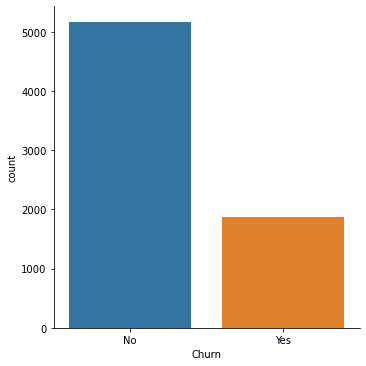

In [40]:
sns.factorplot('Churn',data=df,kind='count',size=5)

In [136]:
print('Taxa de Churn: ',df[df['Churn']=='Yes']['Churn'].value_counts().sum()/df['Churn'].value_counts().sum()*100,'%')

Taxa de Churn:  26.578498293515356 %


# **Ajustes no Dataset**

In [43]:
#Coluna TotalCharges - Arrumando as Células Vazias
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


## Temos apenas 11 valores nesta situação com possível erro de preenchimento, umas vez que não faz sentido a presença da coluna Churn estar preenchida como "No", MonthlyCharges preenchida com valores acima de zero e os clientes possuirem Tenure igual a zero. Além disso por conta do Tenure zerado não é possível realizar o cálculo para uma aproximação do valor TotalCharge.

## Nesse caso, por estarmos considerando 11 valores dentro de 7043, ou seja, 0.15% as linhas serão excluidas para não interferir nos próximos passos.

In [47]:
# df_clean = df[df['TotalCharges'] != ' '] - Se eu não quisesse excluir
blank_index = df[df['TotalCharges'] == ' '].index
df.drop(blank_index,inplace=True)
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [50]:
#Coluna TotalCharges - Trocando de Objeto para Float
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges'].dtypes

dtype('float64')

In [ ]:
#Troca de ID
df.set_index('customerID',inplace=True)

In [55]:
#Alterando SeniorCitizen para "No" e "Yes"
df['SeniorCitizen'].replace(to_replace=0,value='No',inplace=True)
df['SeniorCitizen'].replace(to_replace=1,value='Yes',inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Continuação da Análise Exploratória dos Dados**

In [64]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [65]:
df.describe(include=object)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

C:\Users\g_fma\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\g_fma\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\g_fma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


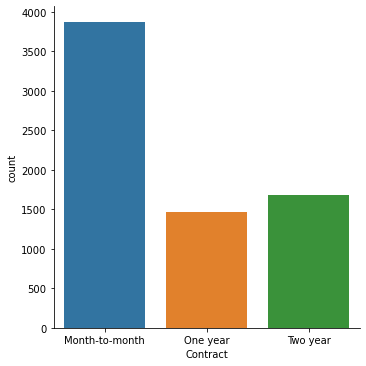

In [78]:
sns.factorplot('Contract',data=df,kind='count',size=5)

<AxesSubplot:>

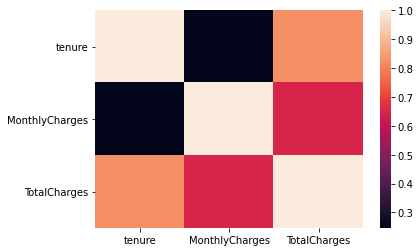

In [71]:
sns.heatmap(df.corr())

# Analisando a Proporção de Contratação de cada Serviço

In [94]:
df_ColumnsFilter = df.drop(columns=['gender','SeniorCitizen','Partner','Dependents','tenure','MultipleLines','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn'])
df_ColumnsFilter.head()

,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,,
7590-VHVEG,No,DSL,No,Yes,No,No,No,No
5575-GNVDE,Yes,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,Yes,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,No,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Yes,Fiber optic,No,No,No,No,No,No


In [98]:
list_rows = df_ColumnsFilter.columns
list_values = []

In [99]:
for a in list_rows:
    x = df[df[a] != 'No'][a].value_counts().sum()
    list_values.append(x)
list_values

[6352, 5512, 3535, 3945, 3938, 3560, 4223, 4251]

<AxesSubplot:>

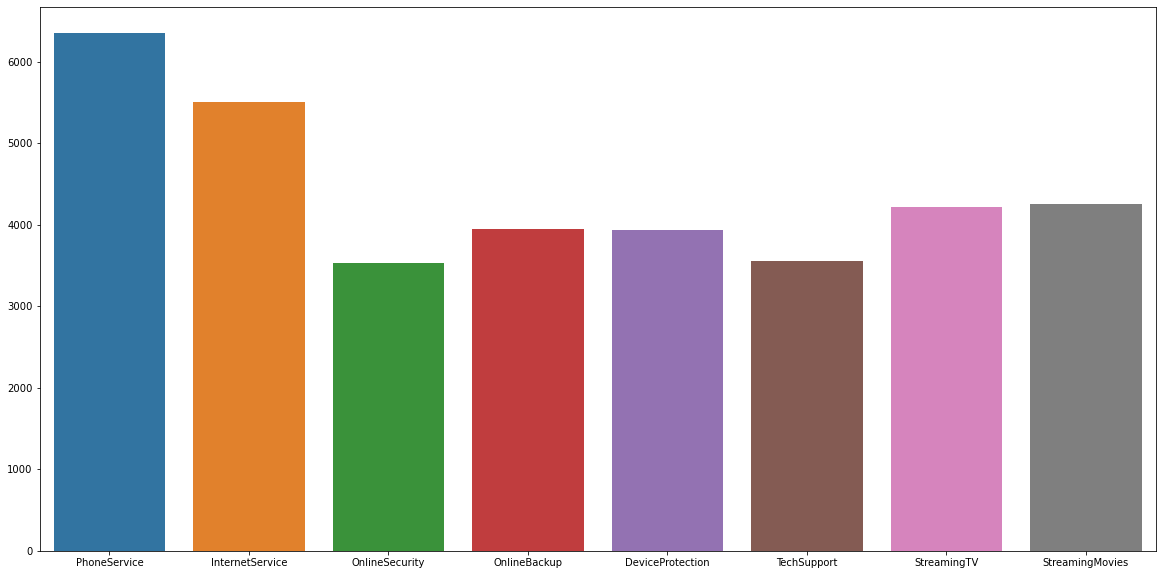

In [120]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=list_rows,y=list_values,ax=ax)

# **Analisando o Churn**

In [125]:
df_Churn = df[df['Churn']=='Yes']

In [ ]:
df_ColumnsFilter_Churn = df_Churn.drop(columns=['gender','SeniorCitizen','Partner','Dependents','tenure','MultipleLines','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn'])

In [130]:
list_rows_Churn = df_ColumnsFilter_Churn.columns
list_values_Churn = []

for a in list_rows_Churn:
    x = df_Churn[df_Churn[a] != 'No'][a].value_counts().sum()
    list_values_Churn.append(x)
list_values_Churn

[1699, 1756, 408, 636, 658, 423, 927, 931]

<AxesSubplot:>

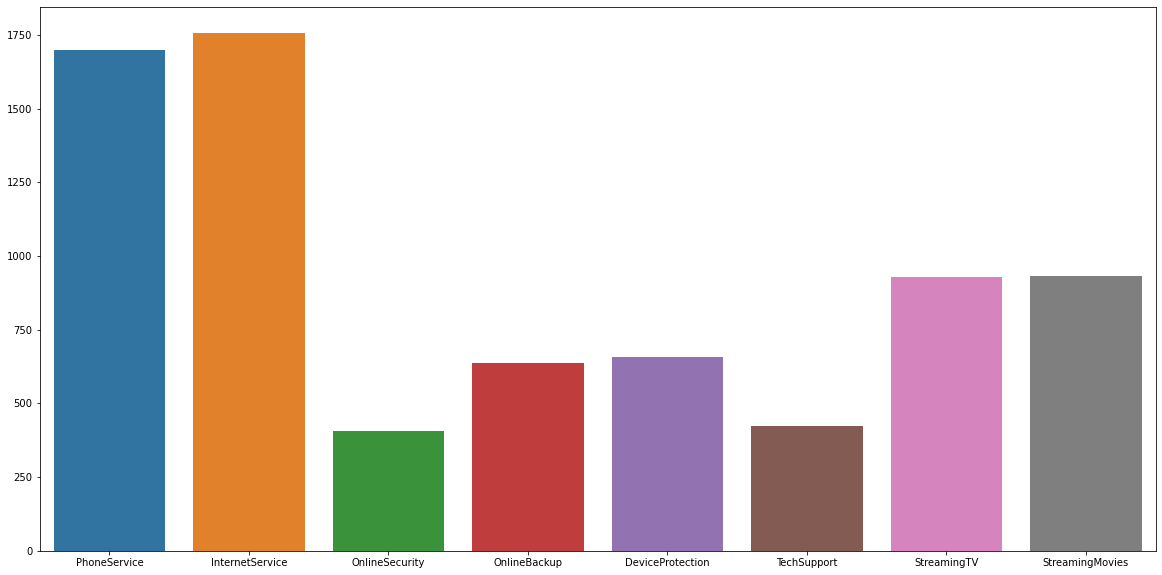

In [131]:
fig, axc = plt.subplots(figsize=(20,10))
sns.barplot(x=list_rows_Churn,y=list_values_Churn,ax=axc)

In [144]:
for a,b,c in zip(list_rows,list_values_Churn,list_values):
    print('Taxa de Churn: ',a,round(b/c*100,2),'%')

Taxa de Churn:  PhoneService 26.75 %
Taxa de Churn:  InternetService 31.86 %
Taxa de Churn:  OnlineSecurity 11.54 %
Taxa de Churn:  OnlineBackup 16.12 %
Taxa de Churn:  DeviceProtection 16.71 %
Taxa de Churn:  TechSupport 11.88 %
Taxa de Churn:  StreamingTV 21.95 %
Taxa de Churn:  StreamingMovies 21.9 %


# **Hipóteses para serem Avaliadas:**

## 1. Os clientes que cancelaram possuim quantos serviços contratados? Foi um motivo financeiro por parte do cliente?
## 2. Há alguma tendência de algum serviço possuir maior taxa de cancelamento (devido a qualidade, preço, ter se tornado ultrapassado, ou por conta da concorrência oferecer melhores produtos)?
## 3. 


### -- Não temos dados sobre a avaliação dos serviços prestados --

# **Analisando InternetService**

In [148]:
df_Churn[df_Churn['InternetService']!='No'].describe(include=object)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,1756,1756,1756,1756,1756,1756,1756,1756,1756,1756,1756,1756,1756,1756,1756,1756,1756
unique,2,2,2,2,2,3,2,2,2,2,2,2,2,3,2,4,1
top,Female,No,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
freq,883,1285,1116,1458,1586,840,1297,1461,1233,1211,1446,942,938,1556,1358,1056,1756


# **Possíveis Resoluções**

## 1. 
## 2.
## 3.